In [101]:
import numpy as np
import pandas as pd

In [102]:
data = pd.read_csv(r'/content/drive/MyDrive/iris.csv')

In [103]:
X = data.iloc[:,0:4]
 
X_meaned = X - np.mean(X , axis = 0)

In [104]:
target = data.iloc[:,4]

In [105]:
cov_mat = np.cov(X_meaned , rowvar = False)

In [106]:
eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

In [107]:
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:,sorted_index]

In [108]:
n_components = 2
eigenvector_subset = sorted_eigenvectors[:,0:n_components]

In [109]:
X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()

In [111]:
principal_df = pd.DataFrame(X_reduced , columns = ['PC1','PC2'])
 
principal_df = pd.concat([principal_df , pd.DataFrame(target)] , axis = 1)
principal_df

,PC1,PC2,species
0,2.684126,0.319397,setosa
1,2.714142,-0.177001,setosa
2,2.888991,-0.144949,setosa
3,2.745343,-0.318299,setosa
4,2.728717,0.326755,setosa
...,...,...,...
145,-1.944110,0.187532,virginica
146,-1.527167,-0.375317,virginica
147,-1.764346,0.078859,virginica
148,-1.900942,0.116628,virginica


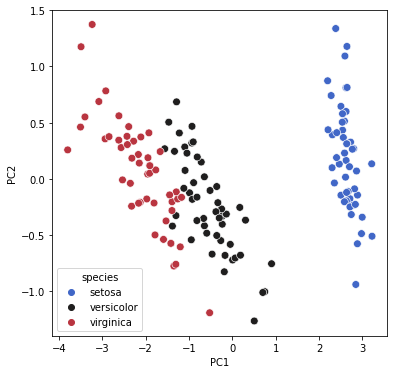

In [112]:
import seaborn as sb
import matplotlib.pyplot as plt
 
plt.figure(figsize = (6,6))
sb.scatterplot(data = principal_df , x = 'PC1',y = 'PC2' , hue = 'species' , s = 60 , palette= 'icefire')

In [115]:
pca = PCA(n_components = 2).fit_transform(X)
pca_dtframe = pd.DataFrame(pca , columns = ['PC1','PC2'])
pca_dtframe = pd.concat([pca_dtframe , pd.DataFrame(target)] , axis = 1)
pca_dtframe

,PC1,PC2,species
0,-2.684126,0.319397,setosa
1,-2.714142,-0.177001,setosa
2,-2.888991,-0.144949,setosa
3,-2.745343,-0.318299,setosa
4,-2.728717,0.326755,setosa
...,...,...,...
145,1.944110,0.187532,virginica
146,1.527167,-0.375317,virginica
147,1.764346,0.078859,virginica
148,1.900942,0.116628,virginica


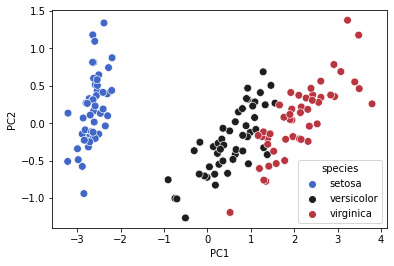

In [116]:
sb.scatterplot(data = pca_dtframe  , x = 'PC1',y = 'PC2' , hue = 'species' , s = 60 , palette= 'icefire')